# K-Means Clustering


Let's work through an example of unsupervised learning - clustering customer data.

## Goal:

When working with unsupervised learning methods, its usually important to lay out a general goal. In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend **heavily** on the domain itself, in this case, marketing.

----

## The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Continuous Feature Analysis

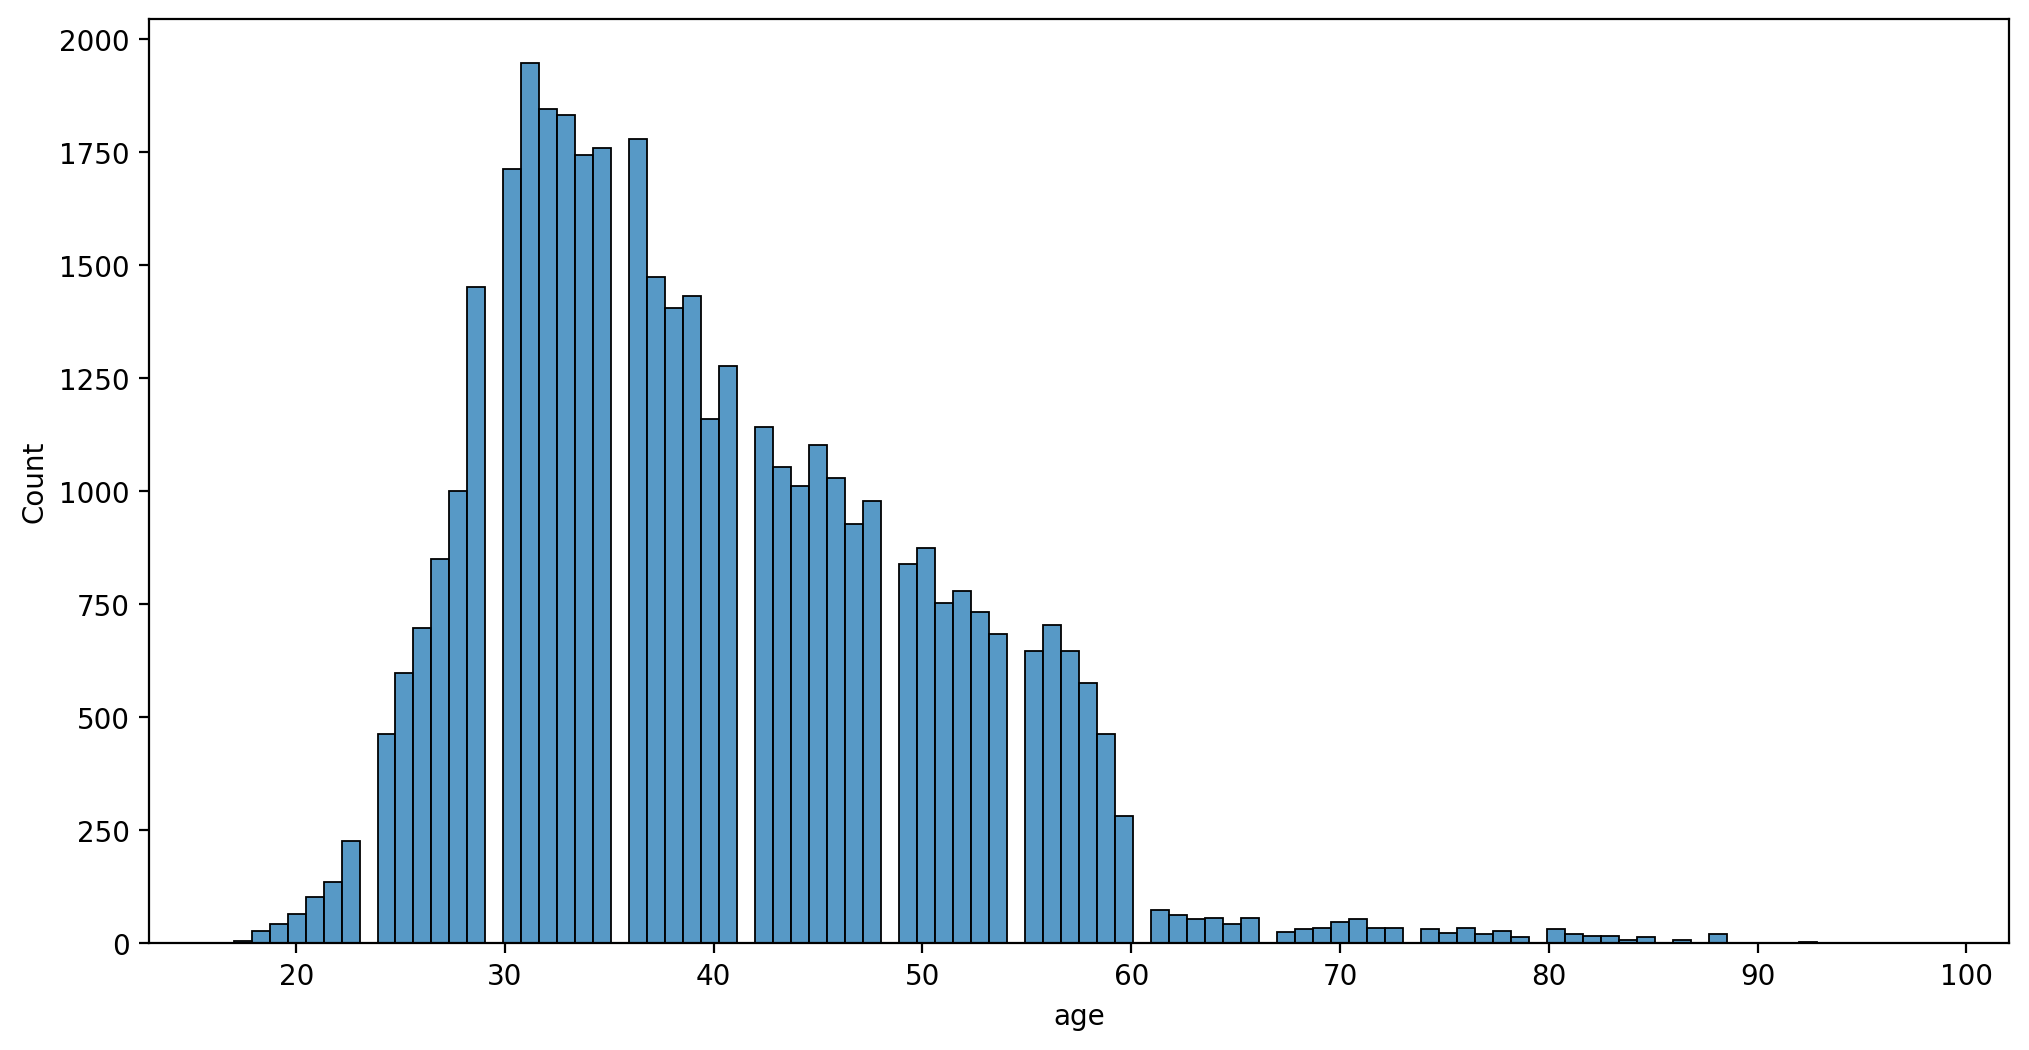

In [12]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age');

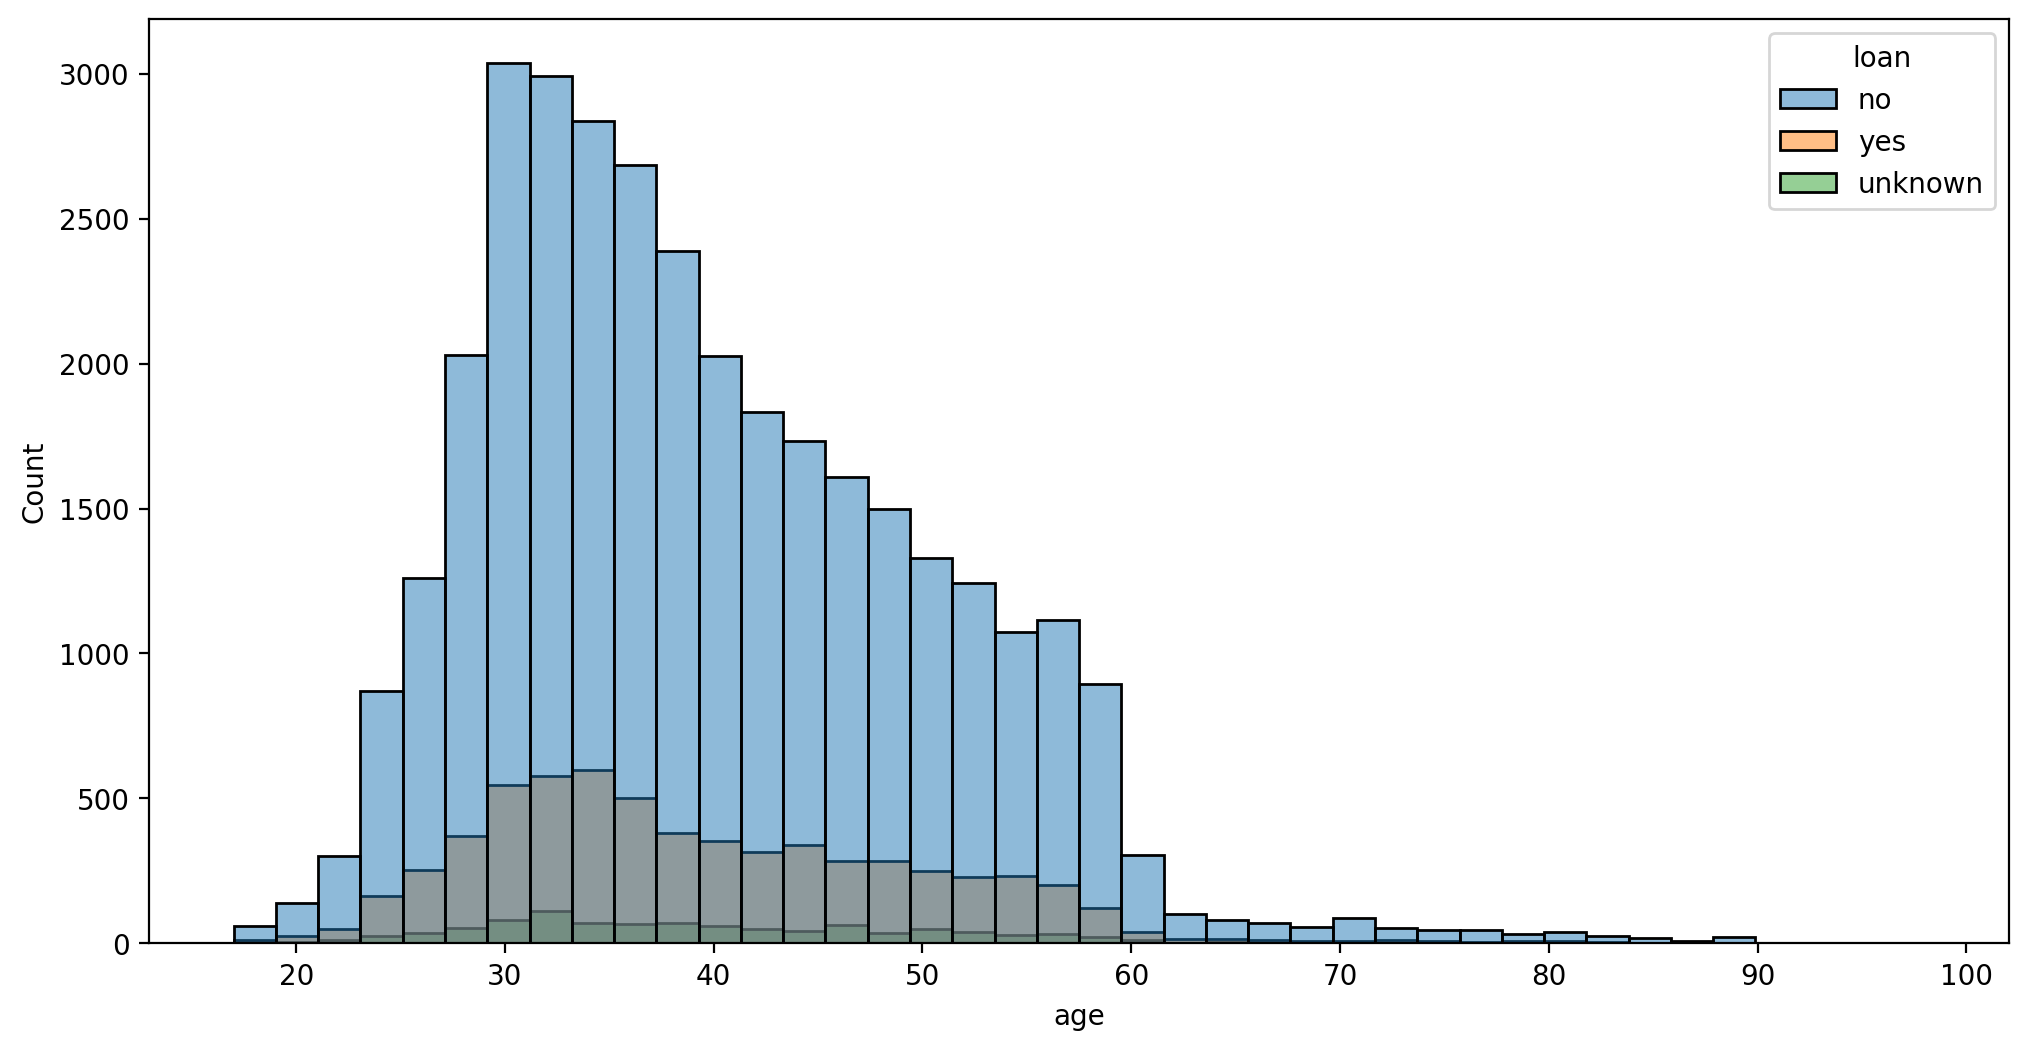

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='age',bins=40,hue='loan');

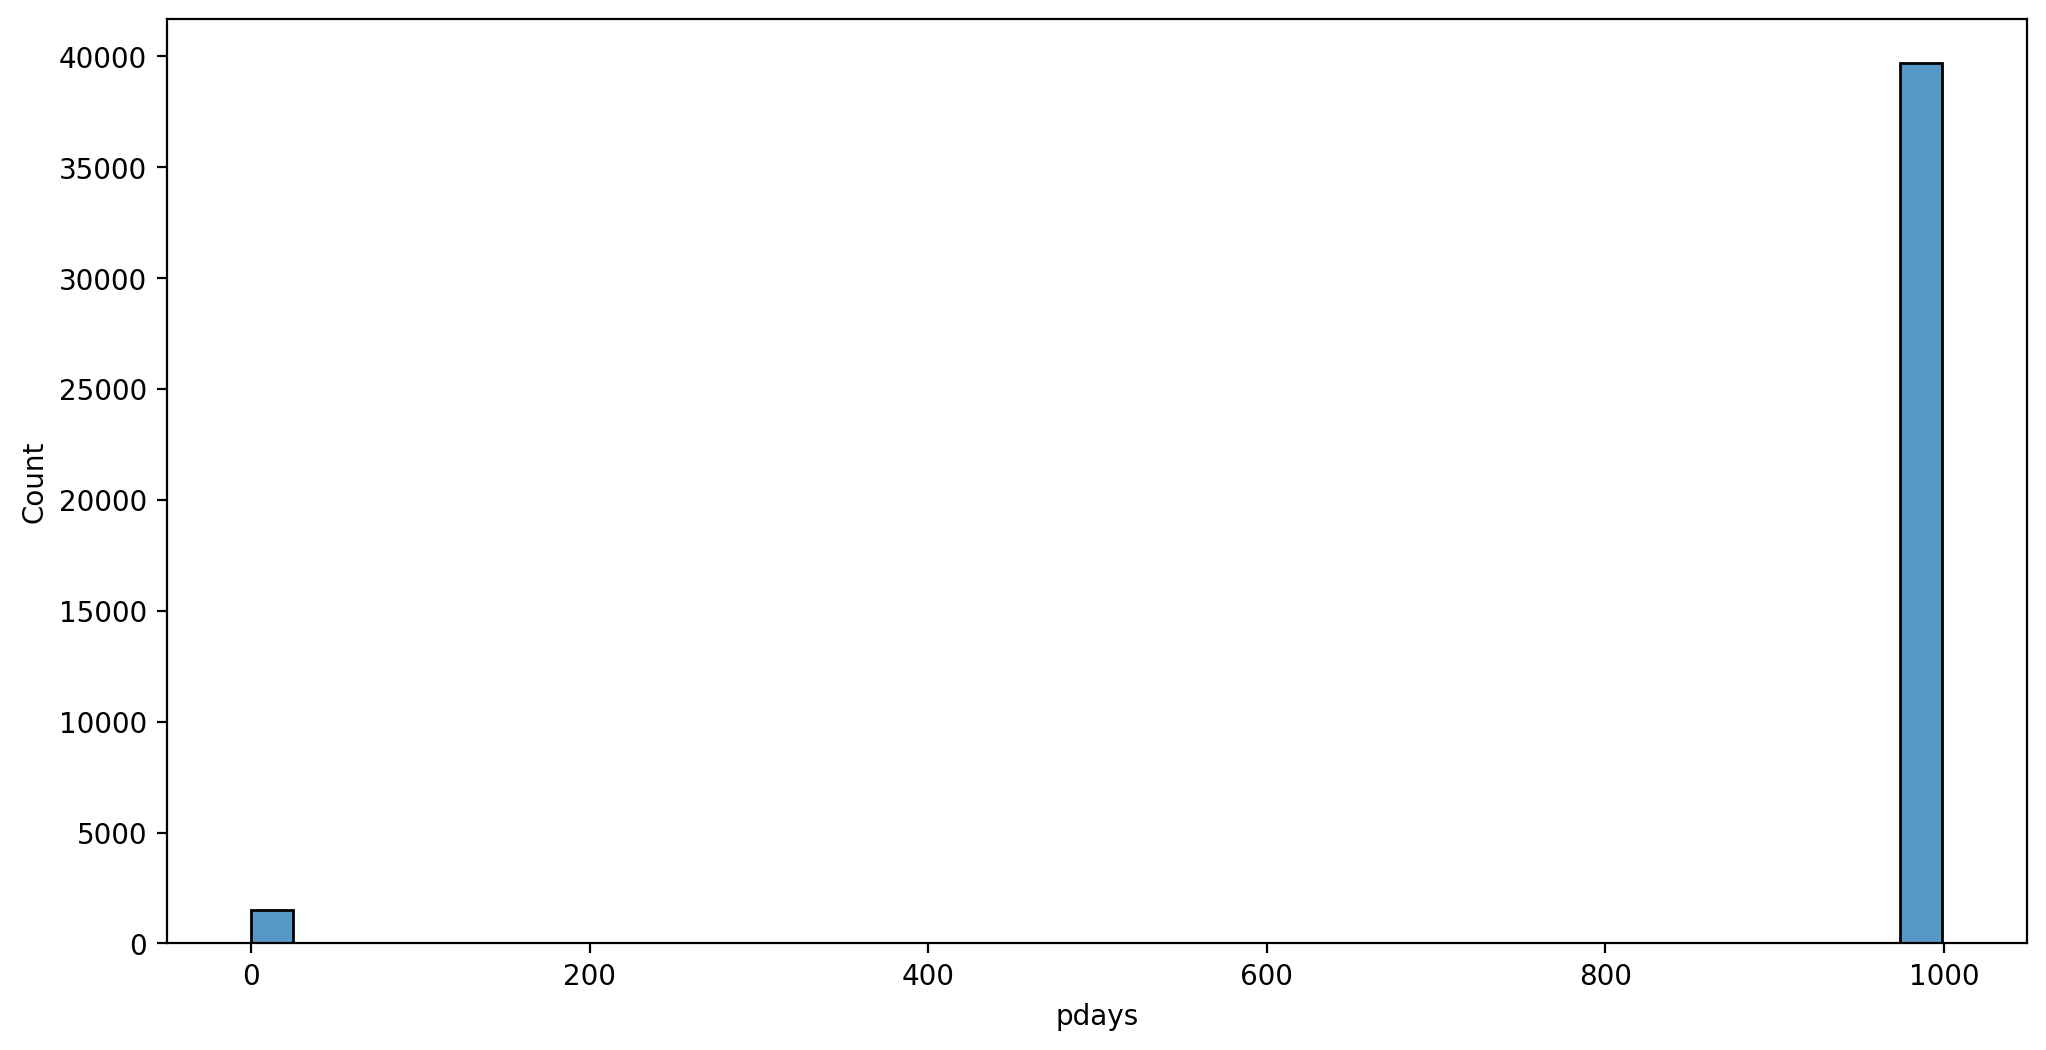

In [14]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='pdays',bins=40);

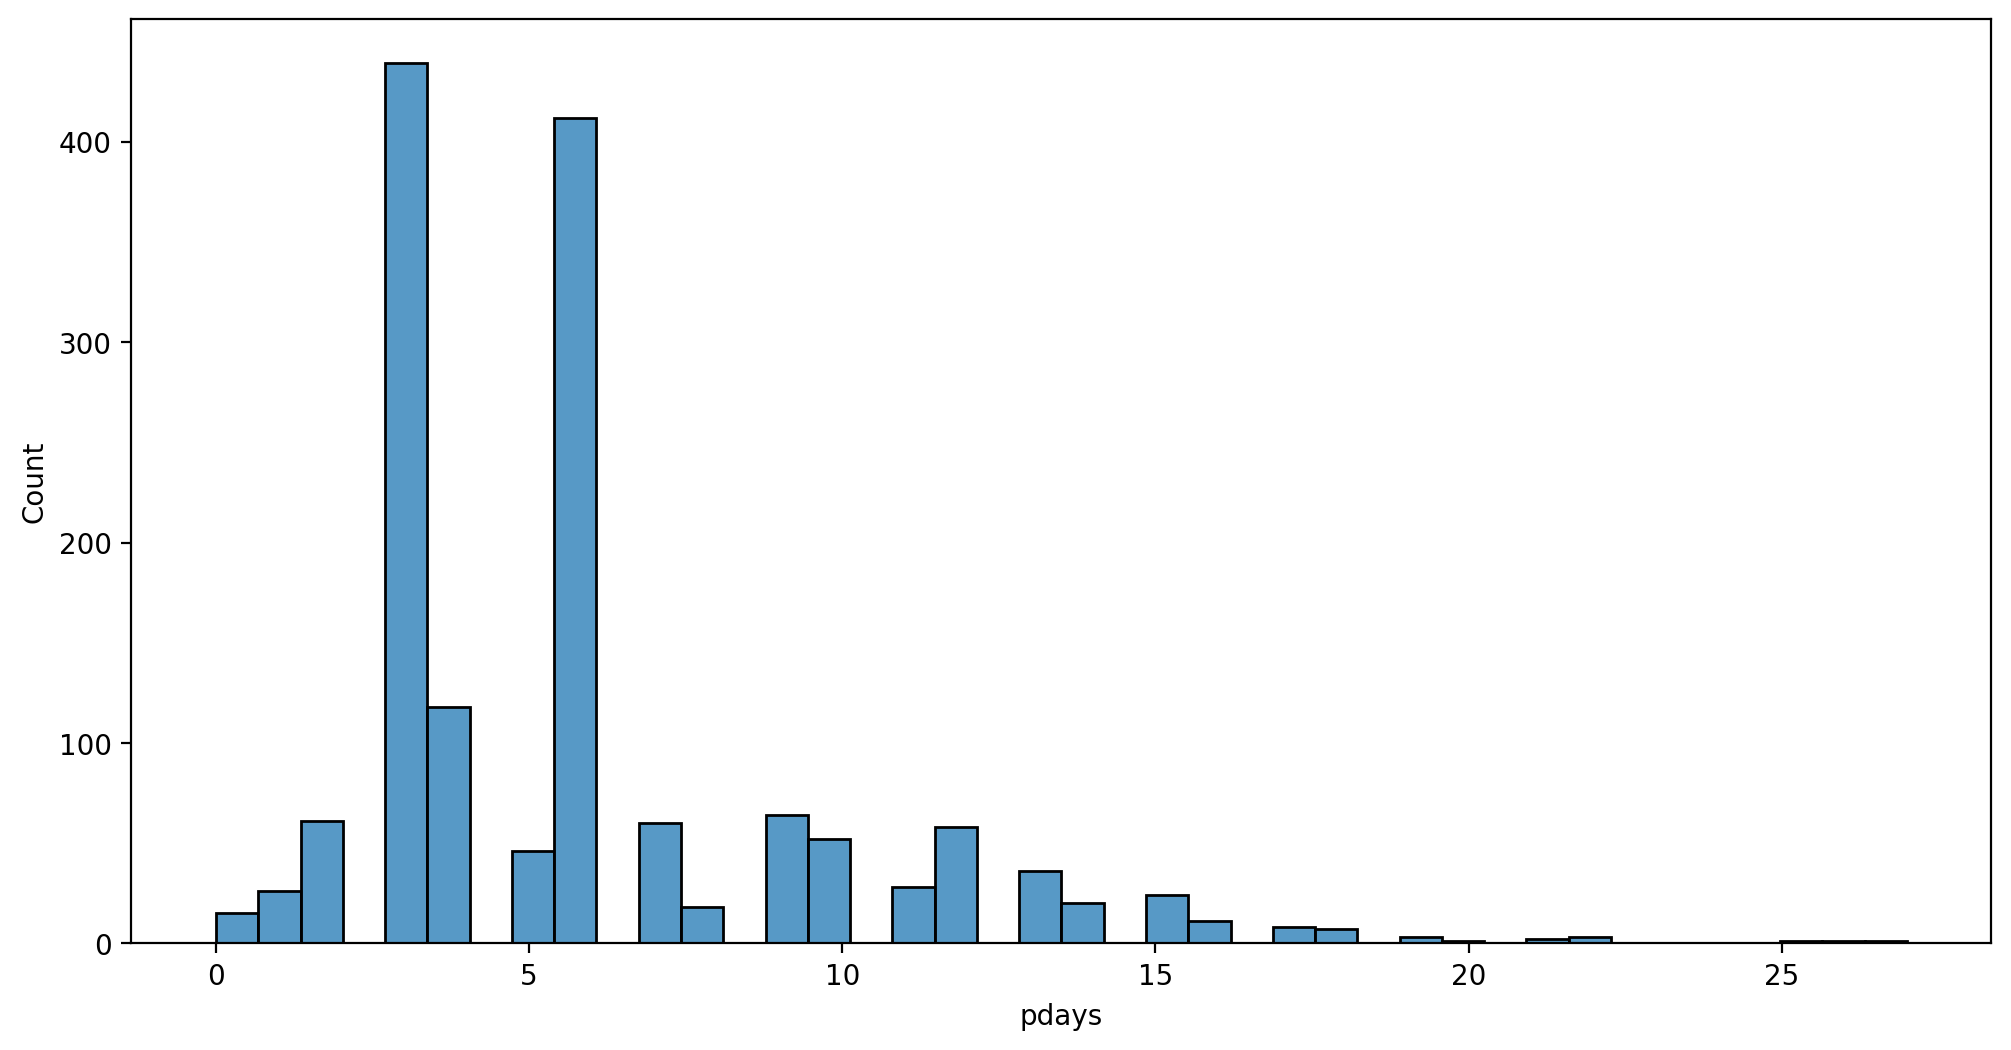

In [15]:
# pdays = 999 mean they never have been contacted
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!= 999], x='pdays',bins=40);

In [16]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [17]:
# in seconds
df['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868])

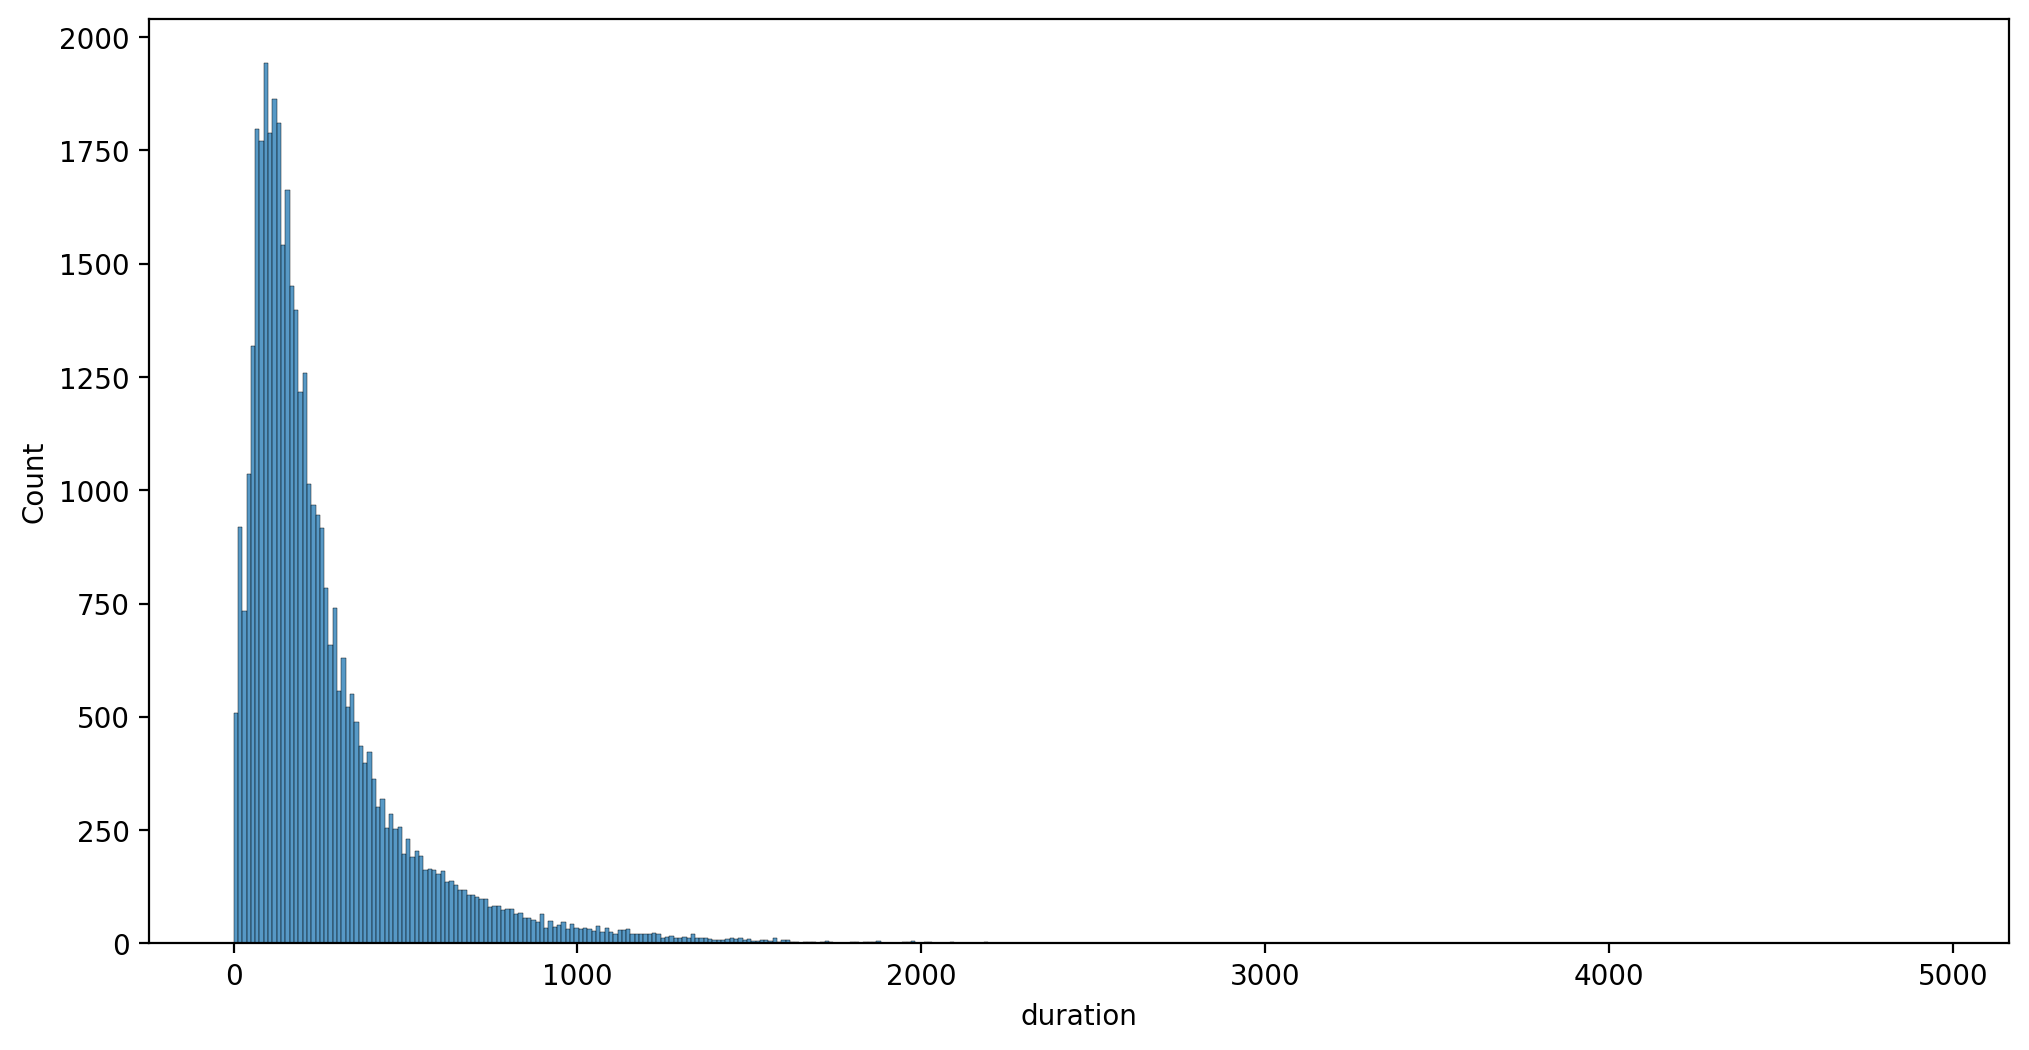

In [20]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x="duration");

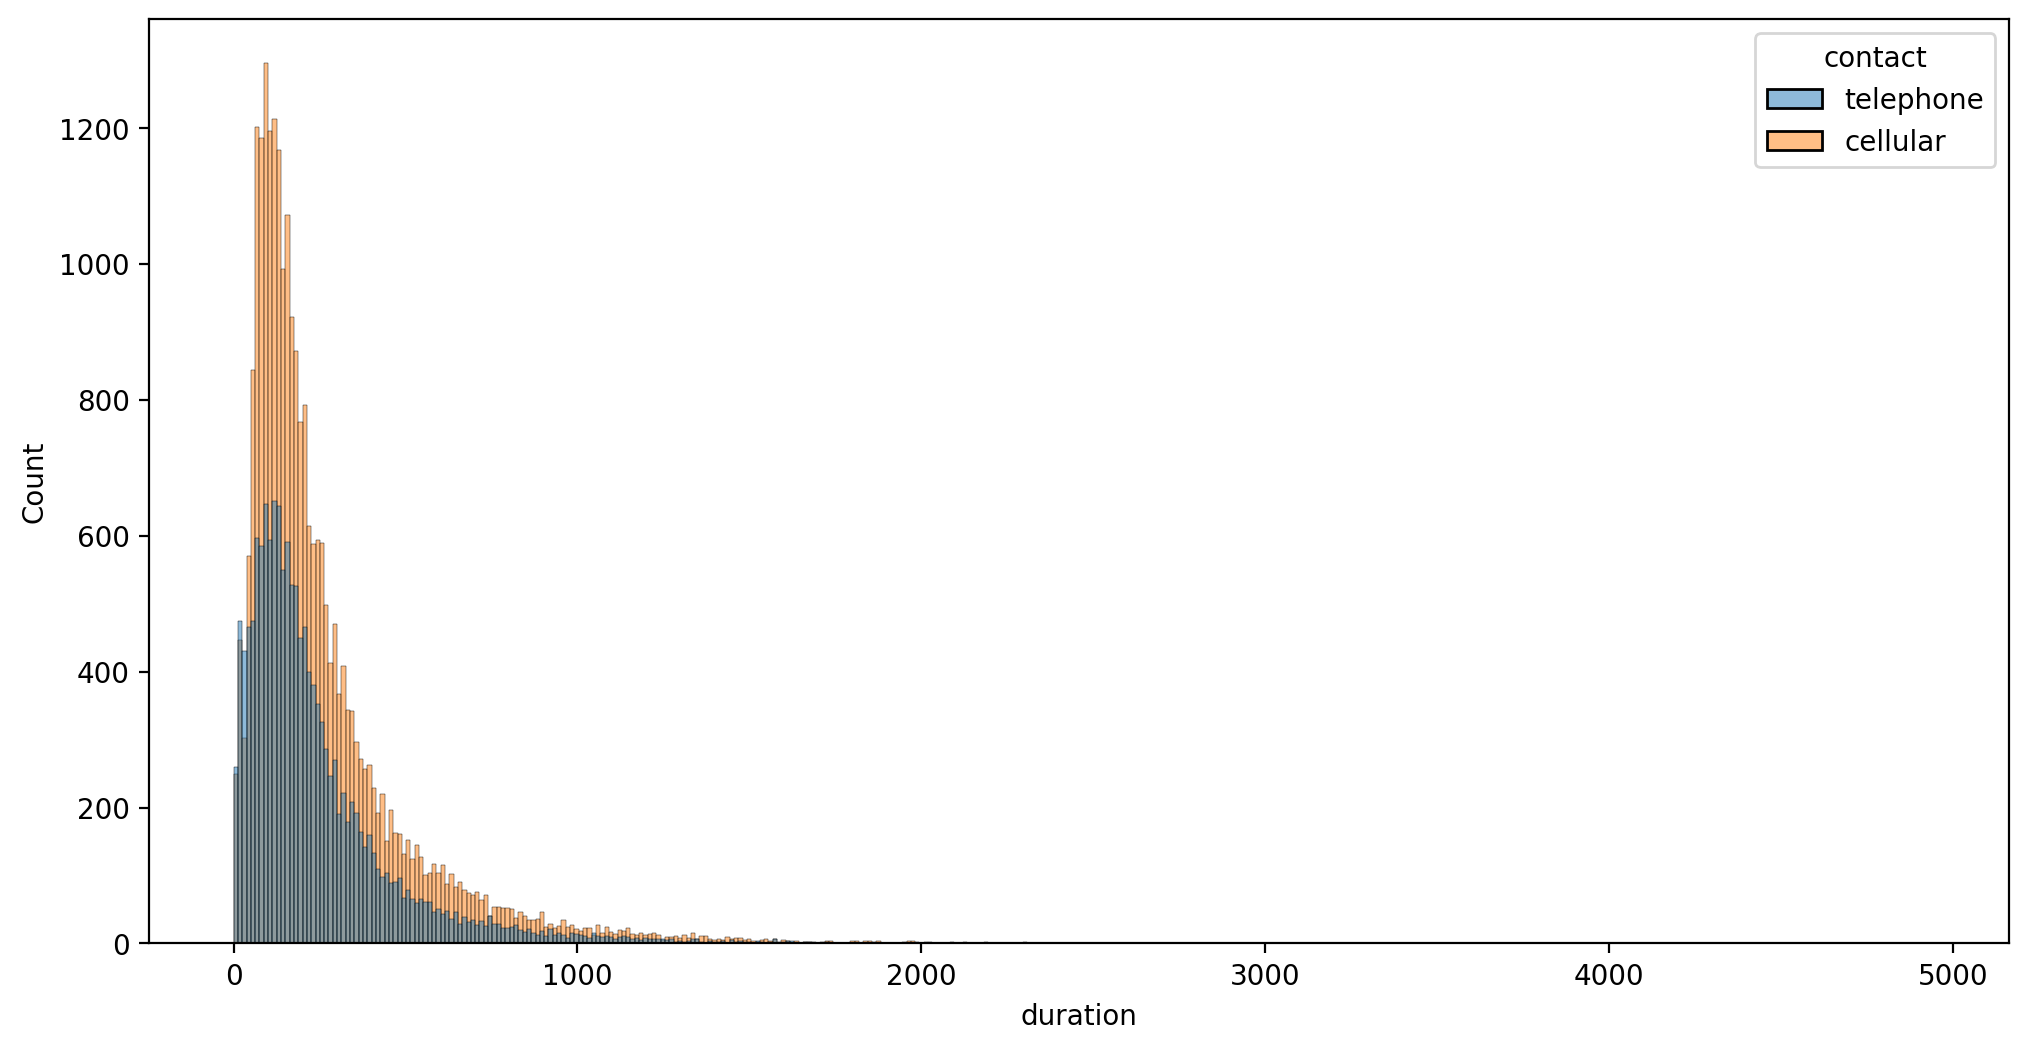

In [24]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x="duration",hue="contact");

(0.0, 1000.0)

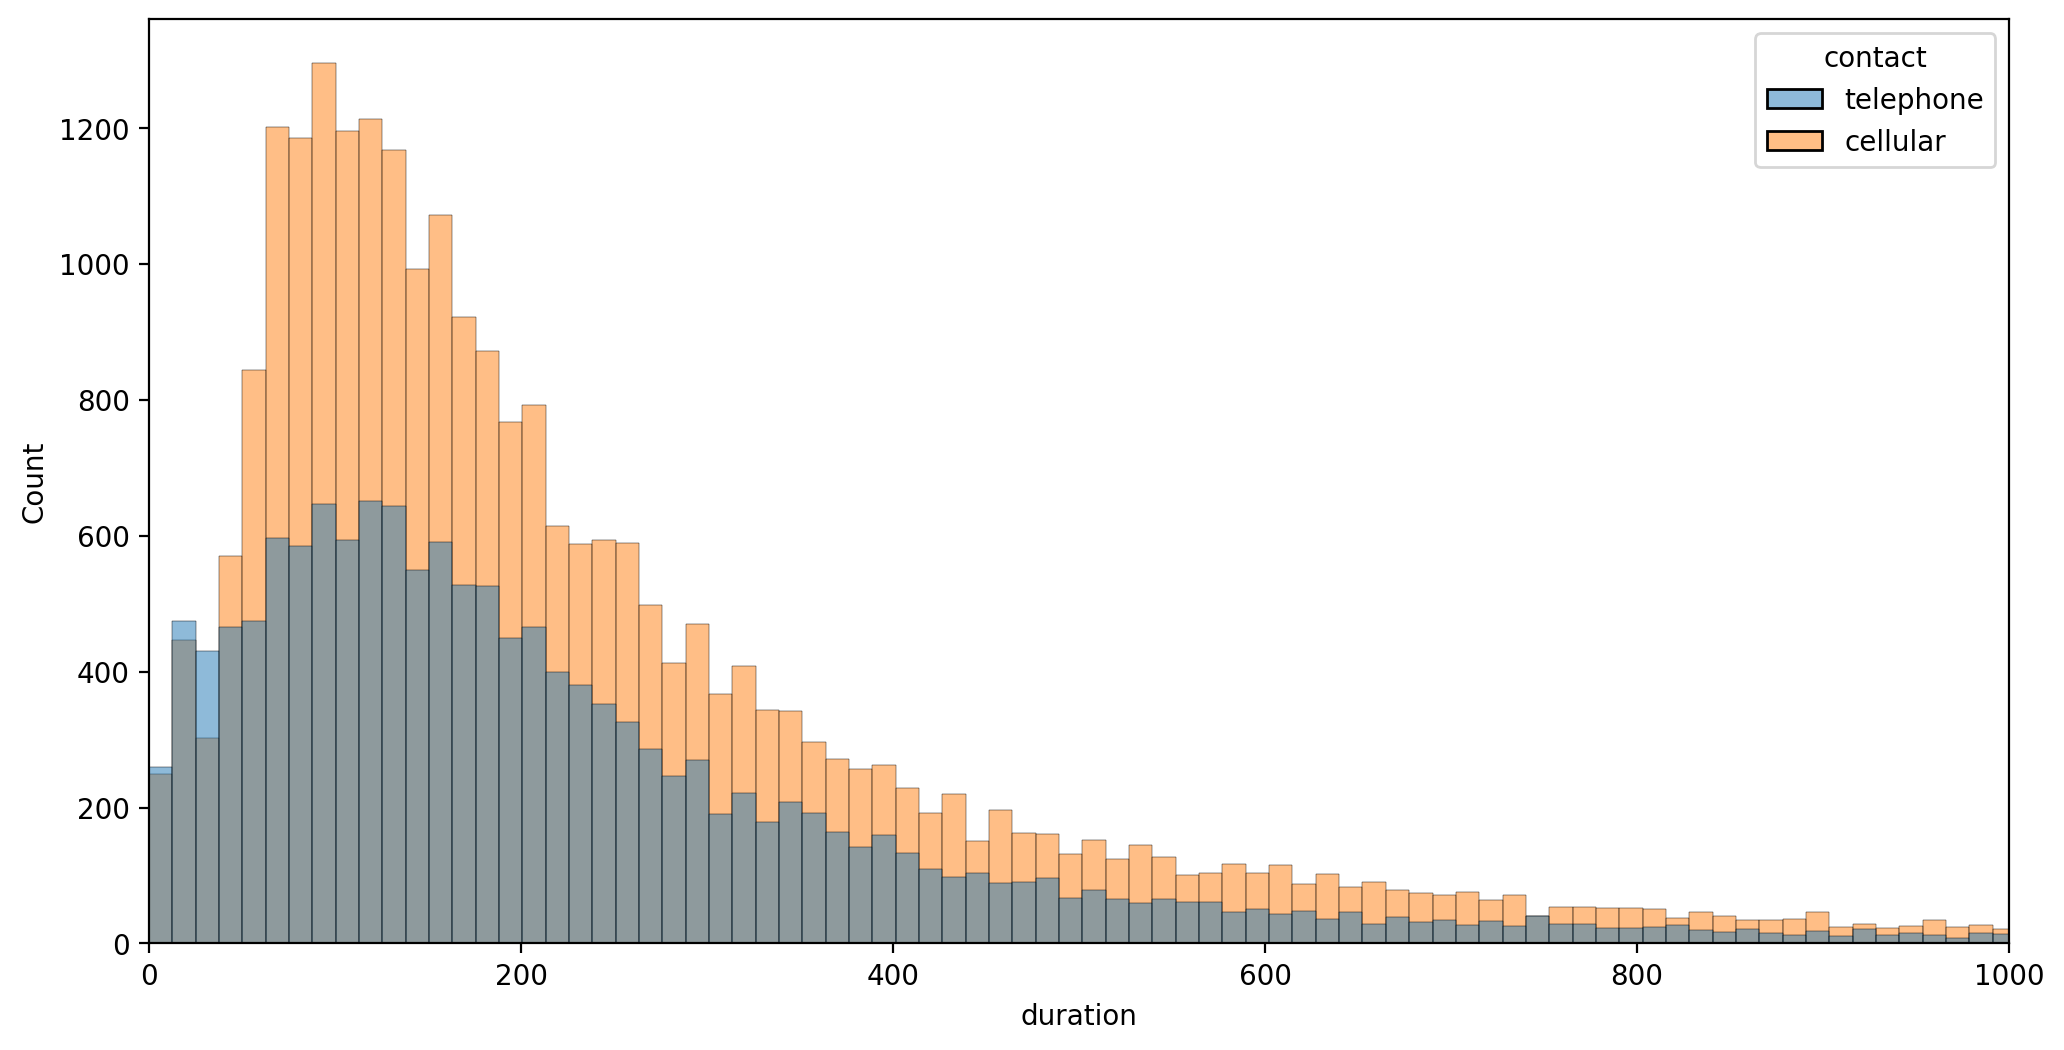

In [25]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x="duration",hue="contact")
plt.xlim(0,1000);

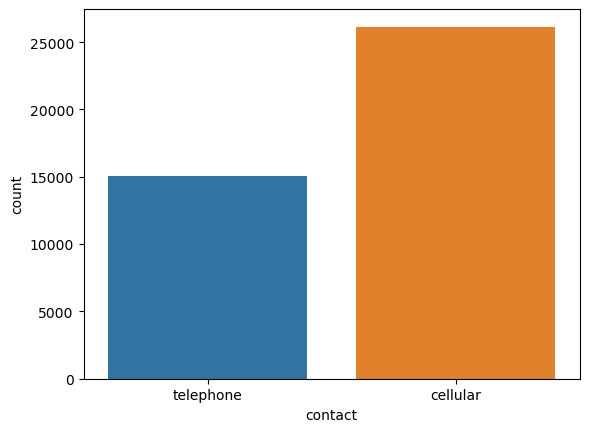

In [27]:
sns.countplot(data=df, x="contact");

In [29]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object', name='job')

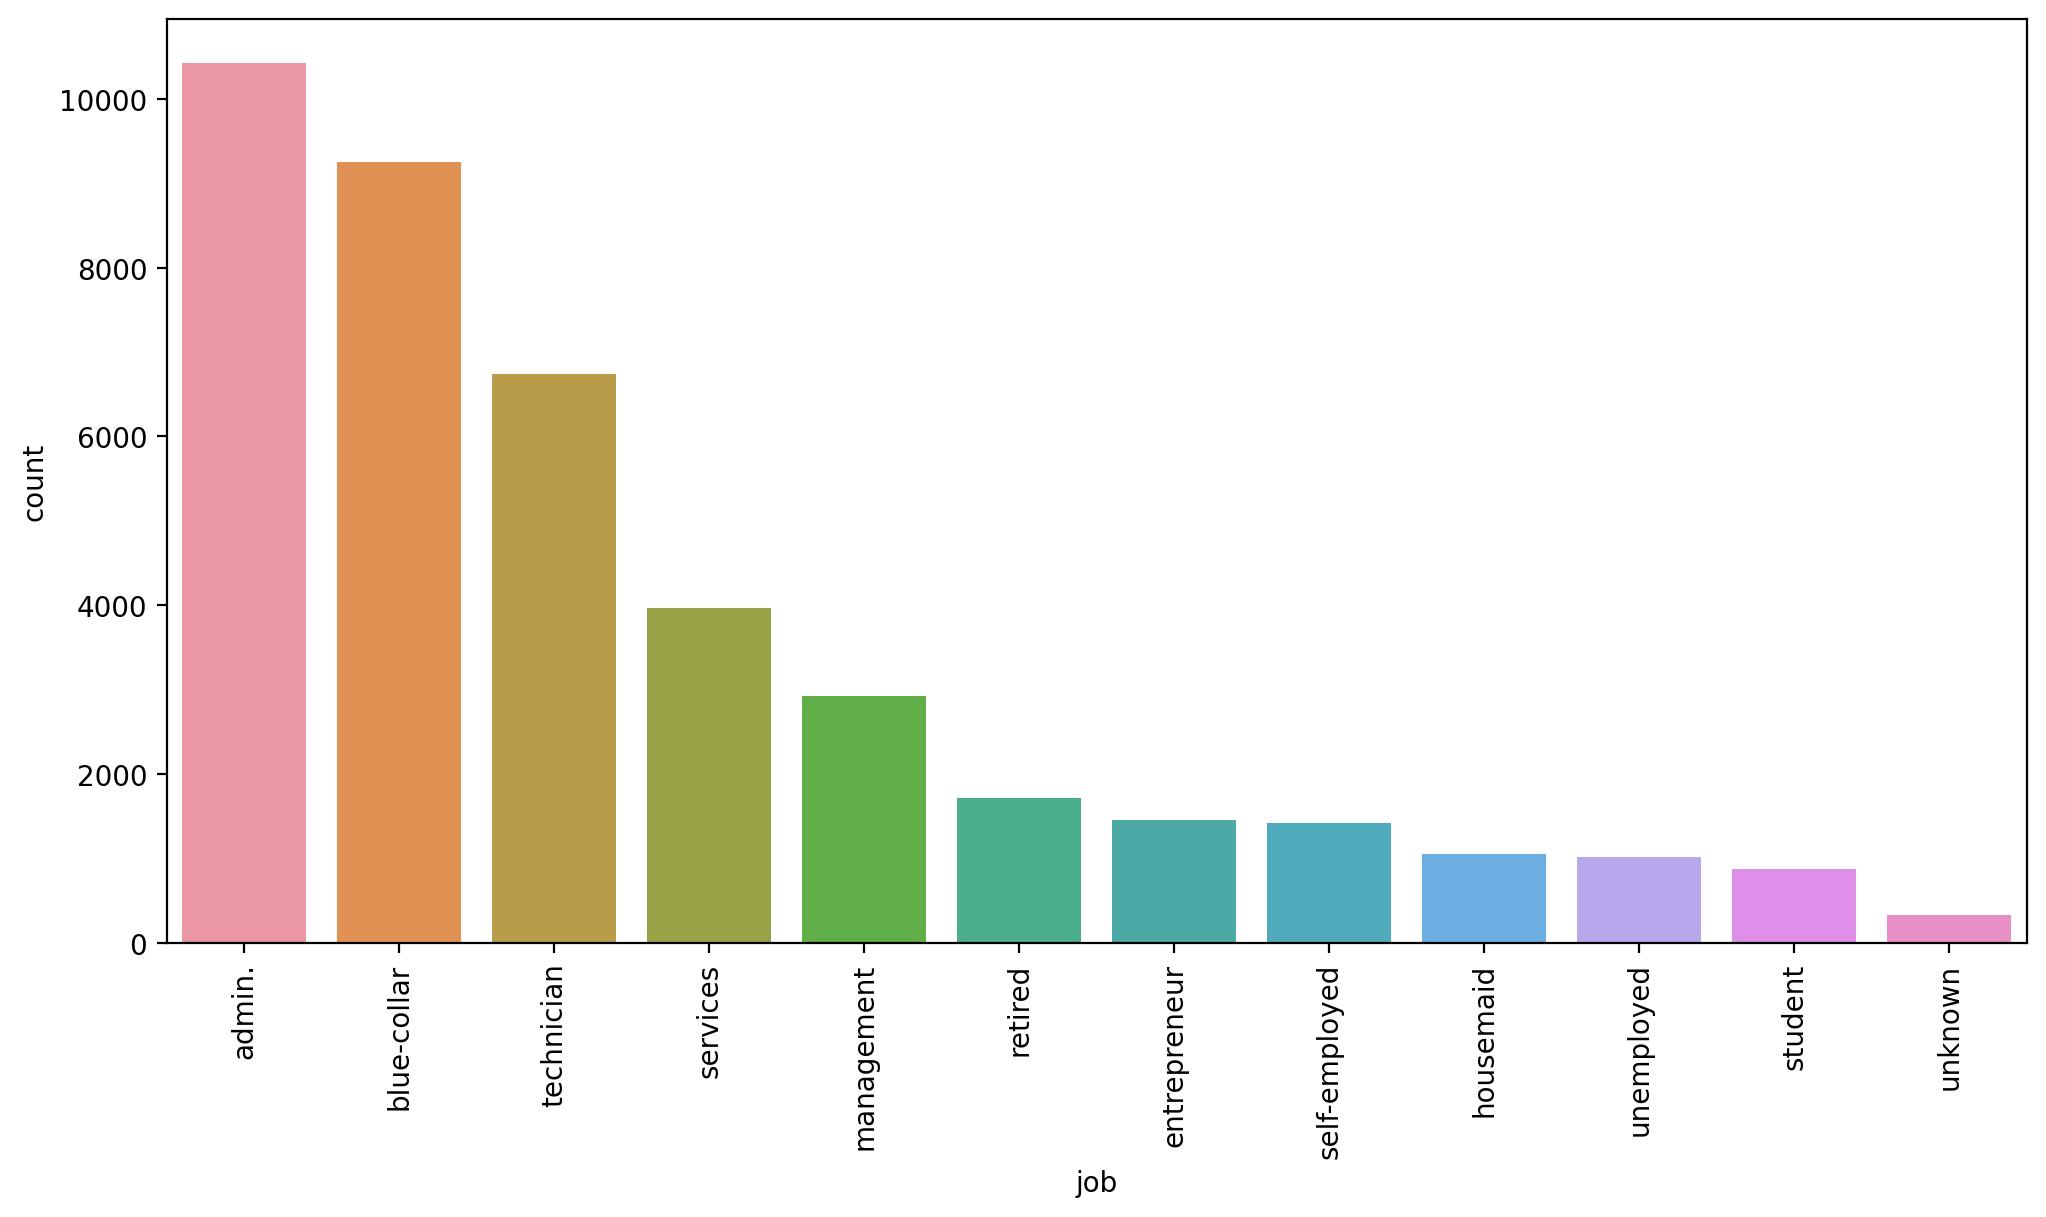

In [30]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(df, x='job',order=df['job'].value_counts().index )
plt.xticks(rotation=90);

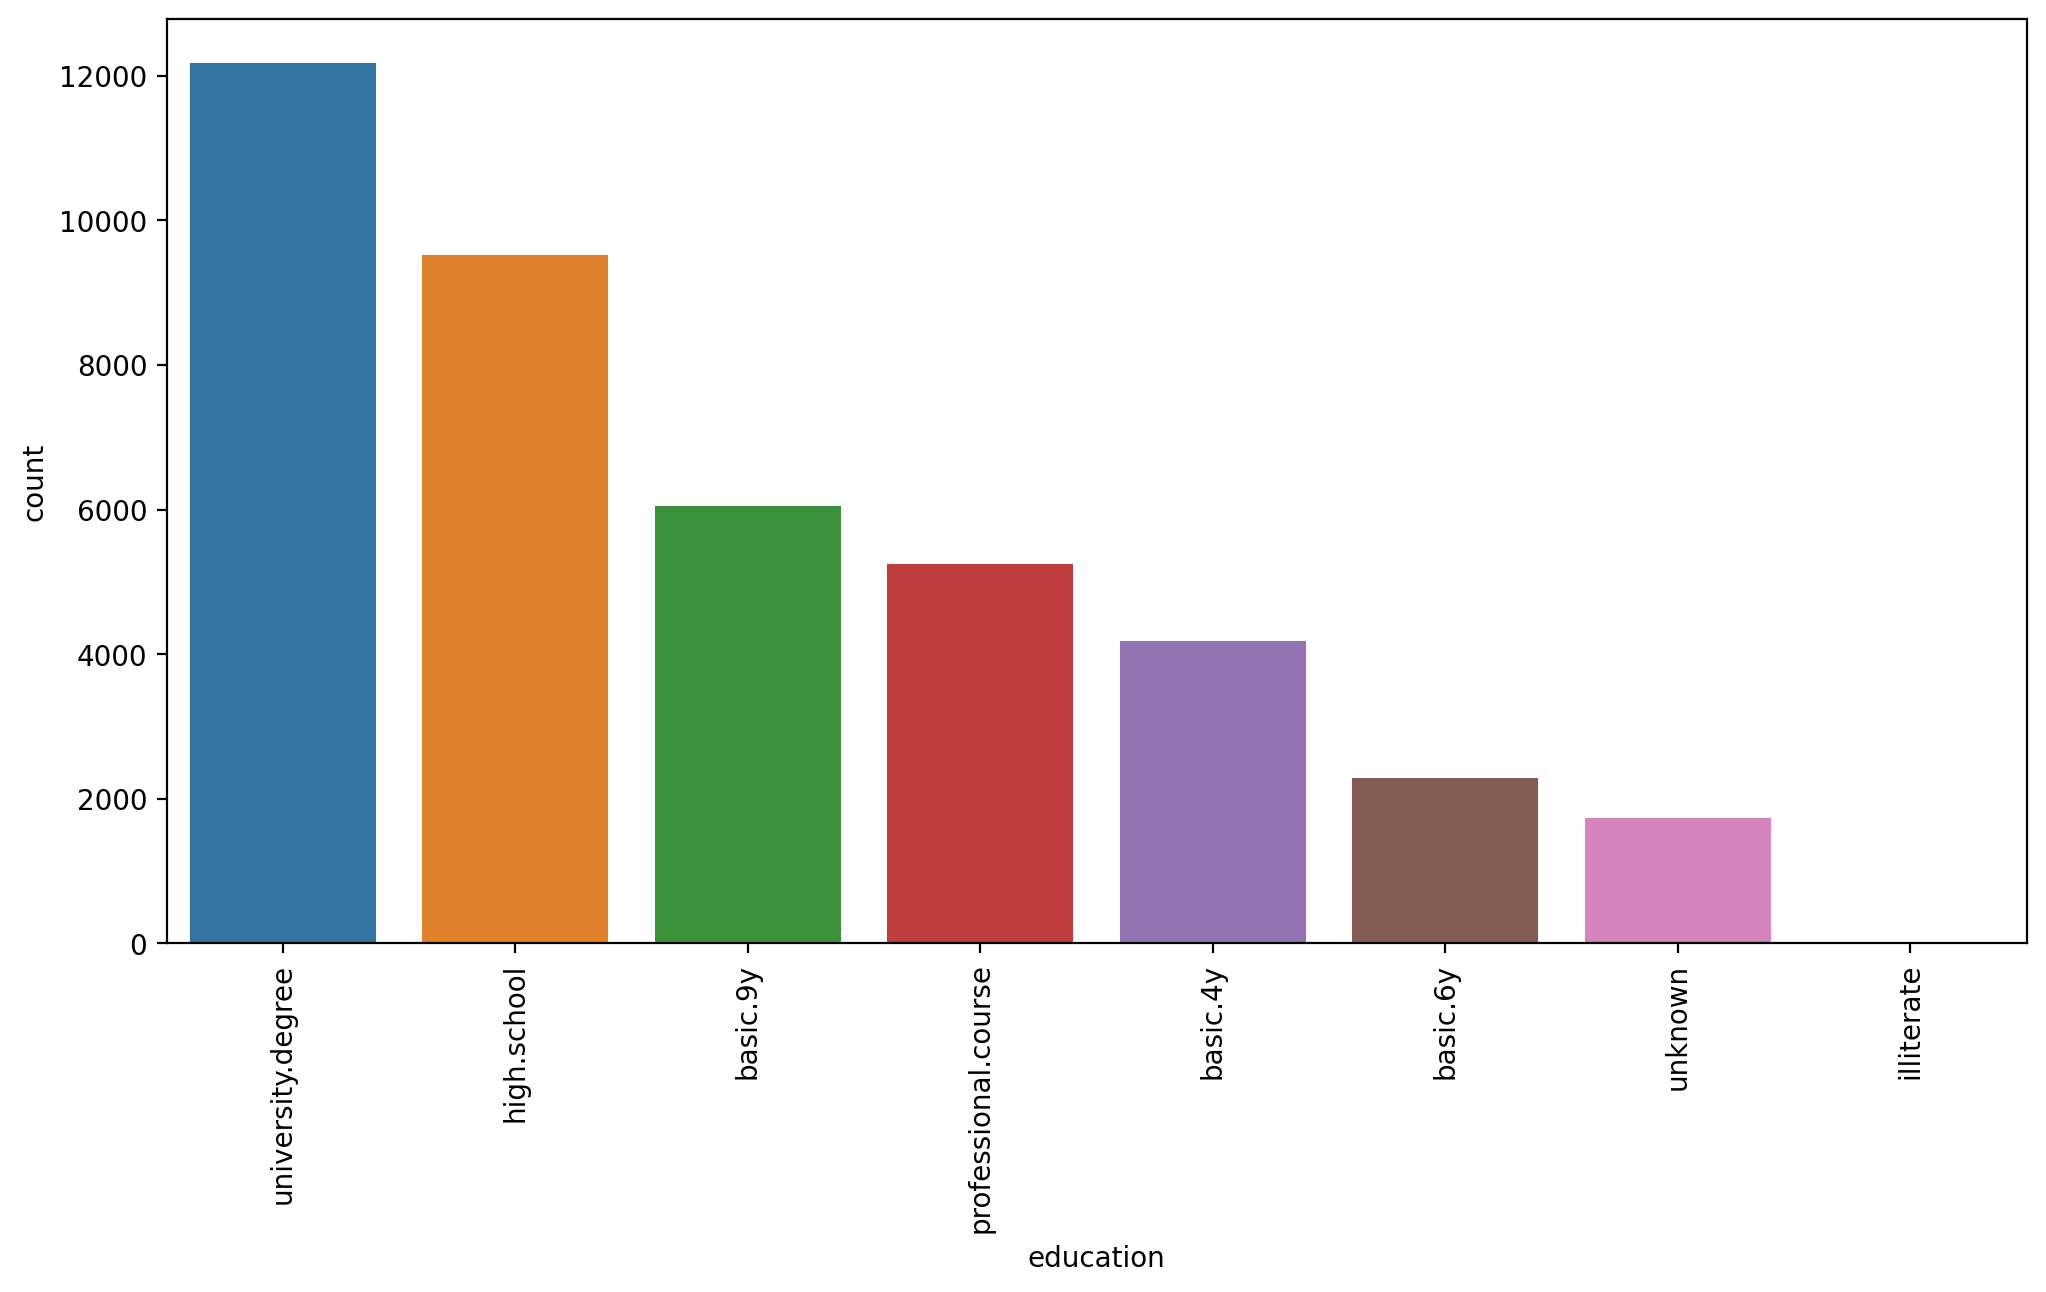

In [31]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(df, x='education',order=df['education'].value_counts().index )
plt.xticks(rotation=90);

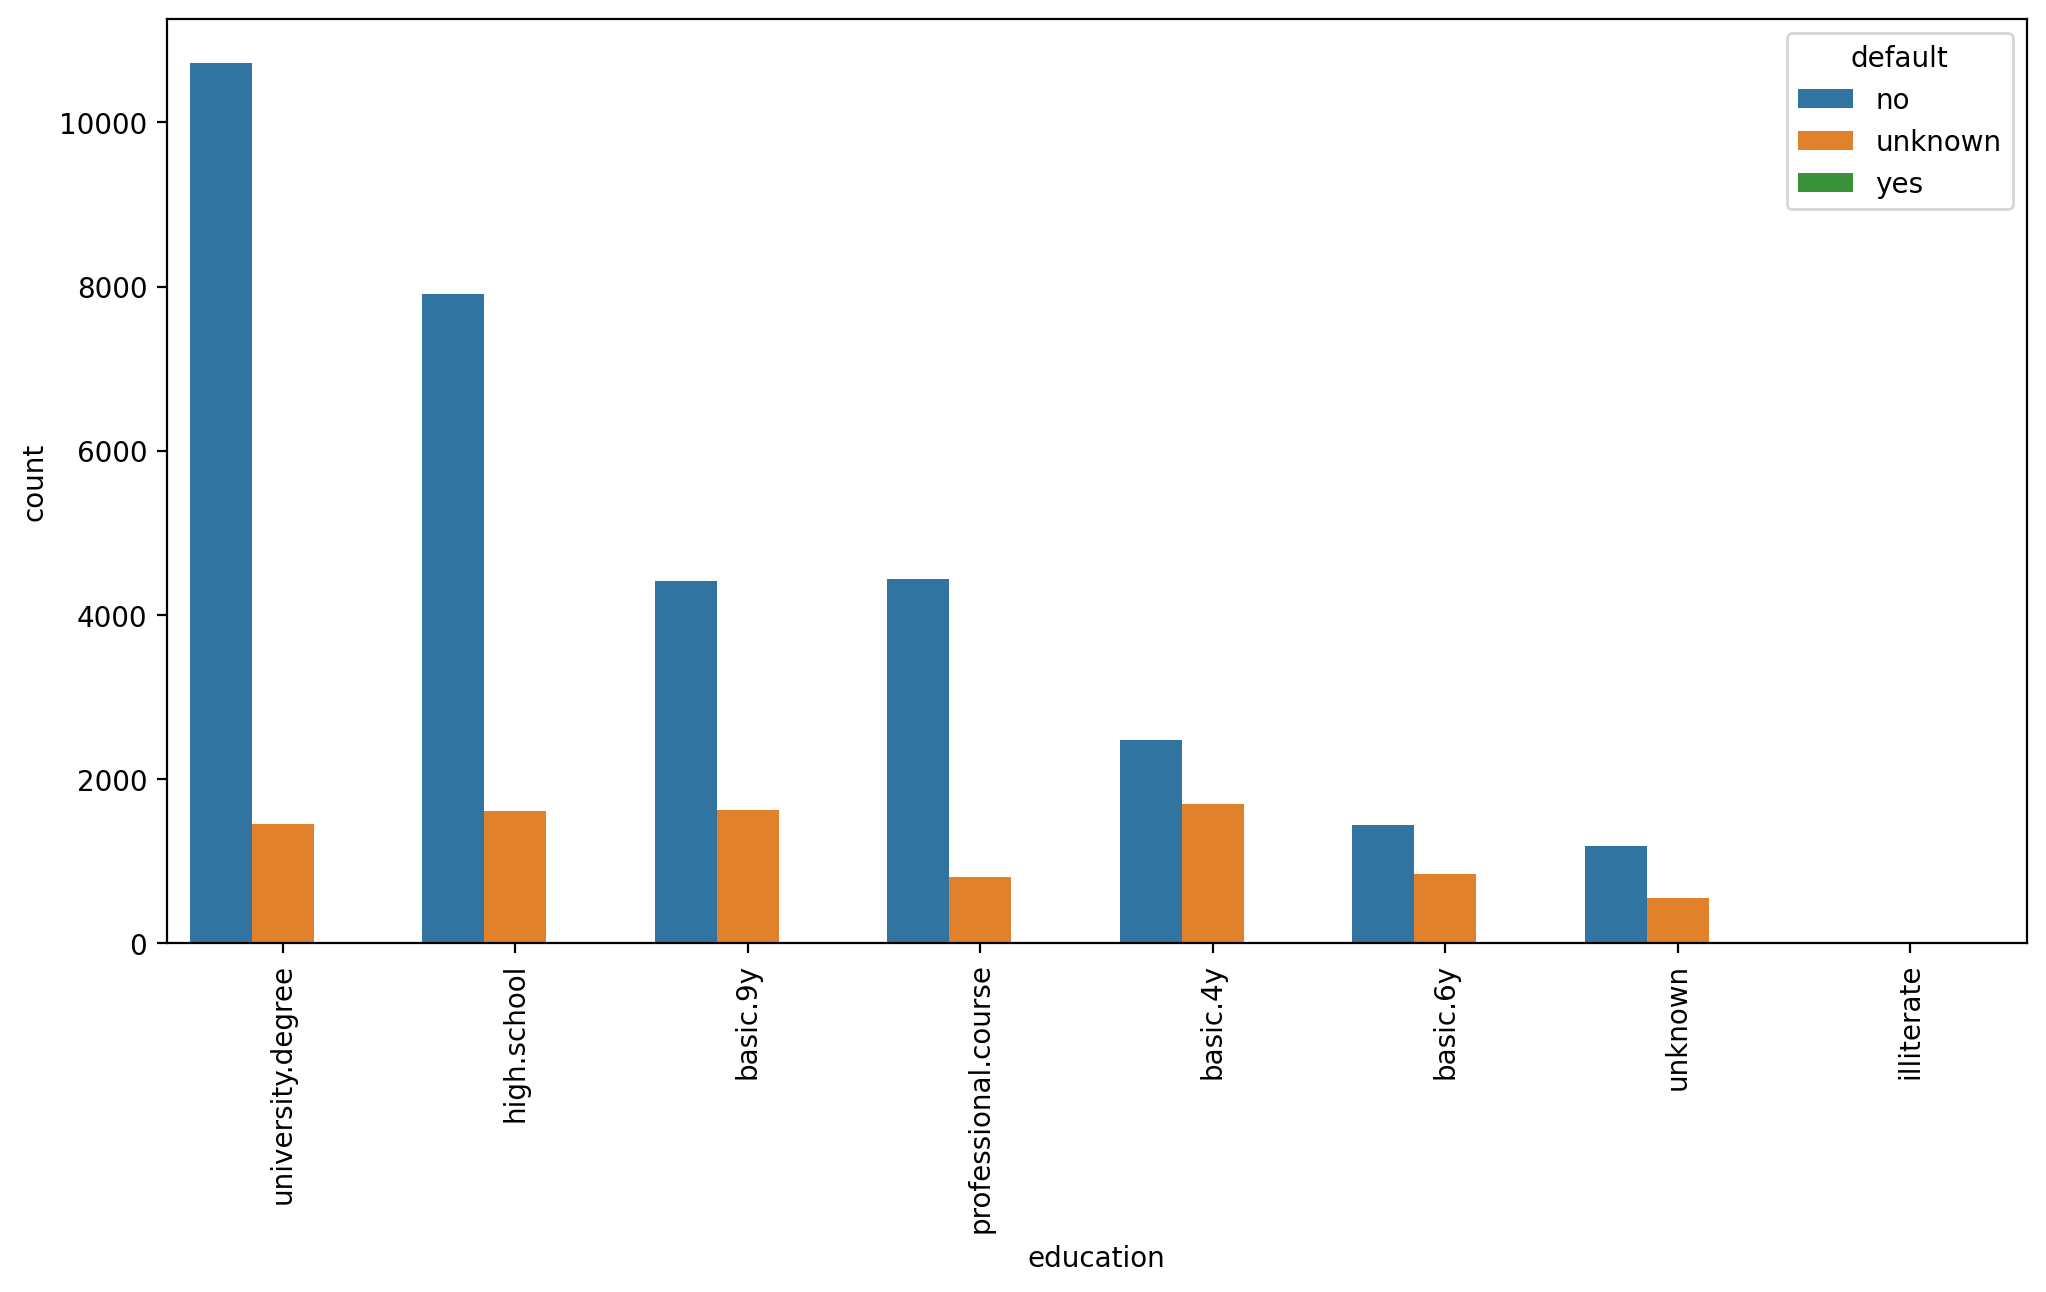

In [32]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(df, x='education',order=df['education'].value_counts().index, hue='default' )
plt.xticks(rotation=90);

<Axes: xlabel='default', ylabel='count'>

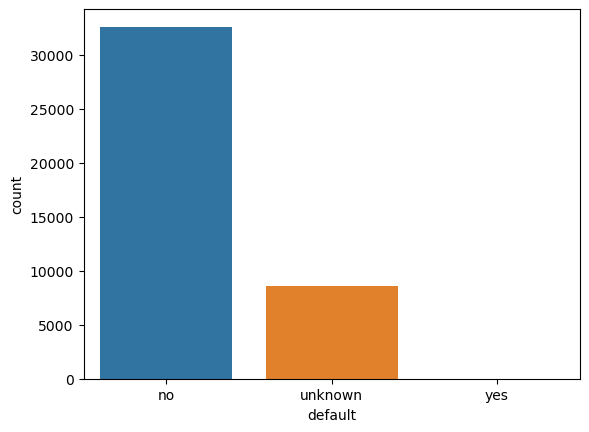

In [33]:
sns.countplot(data=df,x='default')

/Users/brandonkwamou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


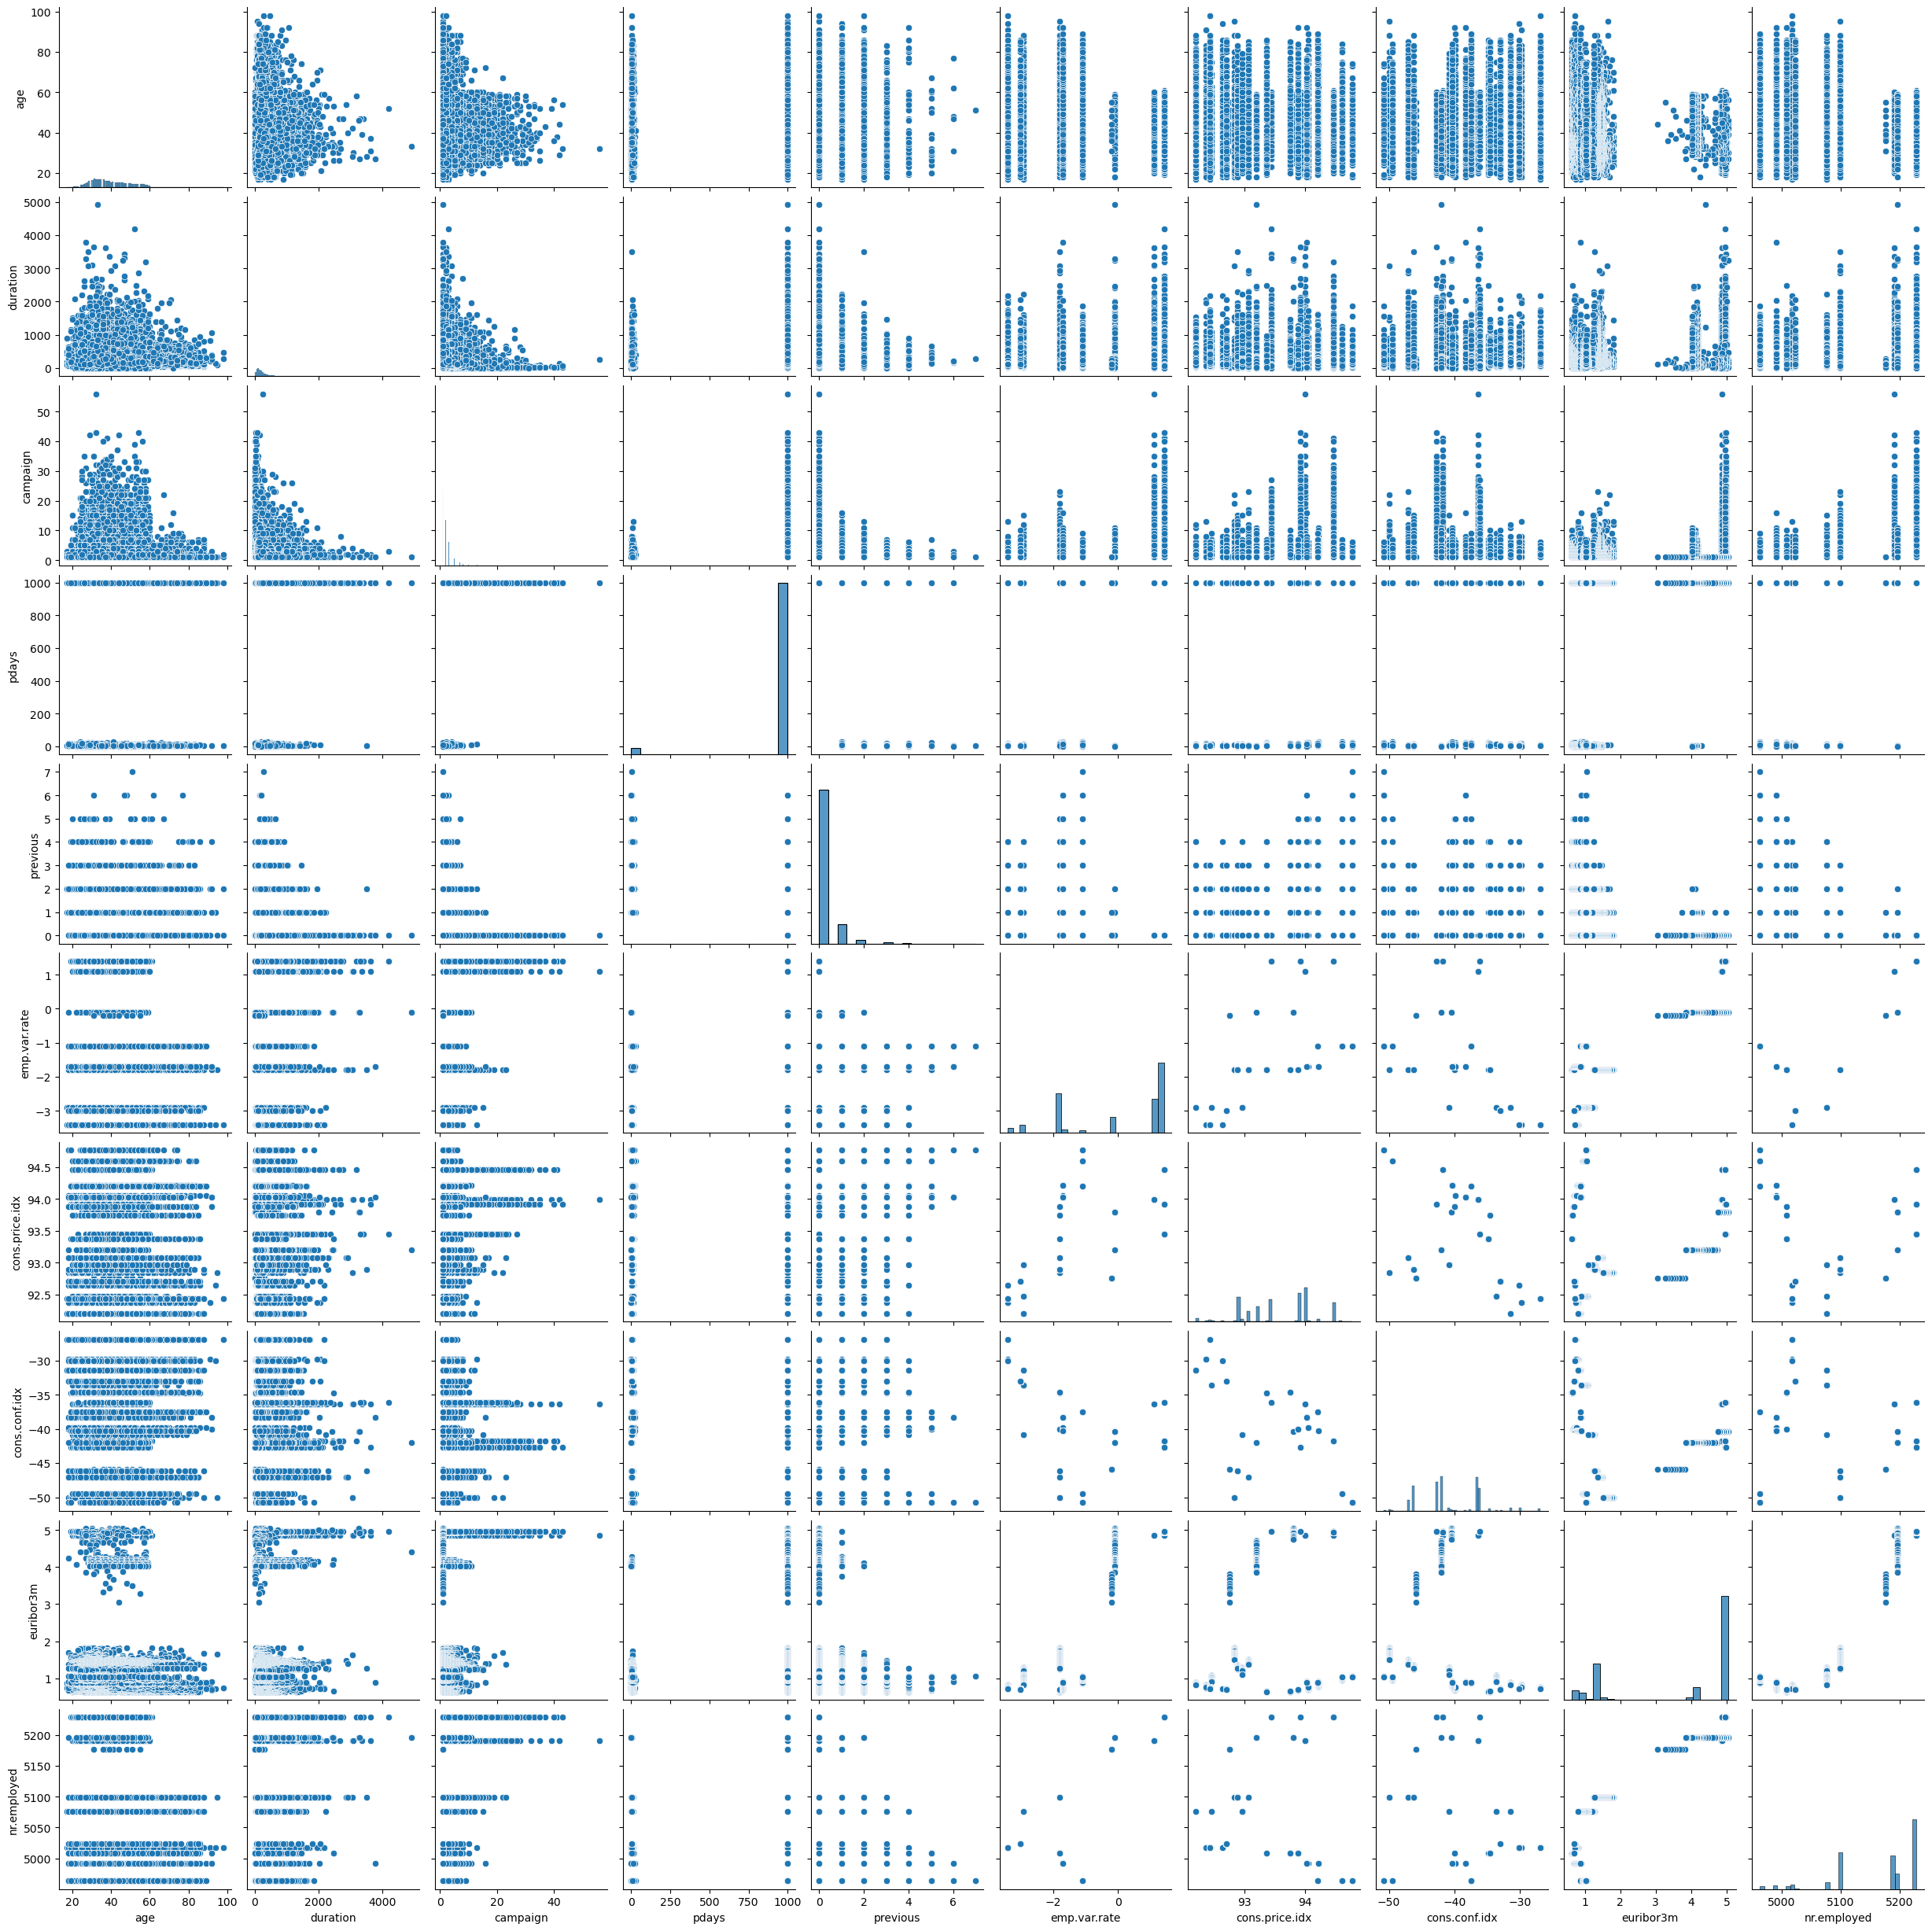

In [34]:
sns.pairplot(df)

## Clustering

### Data Preparation

**UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!**

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.

In [35]:
X = pd.get_dummies(df)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaled_X = scaler.fit_transform(X)

### Creating and Fitting a KMeans Model

Note of our method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [39]:
from sklearn.cluster import KMeans

In [40]:
# help(KMeans)

In [43]:
model = KMeans(n_clusters=2,n_init="auto")

In [48]:
cluster_labels = model.fit_predict(scaled_X)

In [49]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [50]:
X['Cluster'] = cluster_labels

In [ ]:
# X

In [54]:
X.corr()['Cluster'].iloc[:-1].sort_values()

euribor3m              -0.959267
emp.var.rate           -0.932603
nr.employed            -0.886120
cons.price.idx         -0.679394
poutcome_nonexistent   -0.544348
                          ...   
subscribed_yes          0.294748
month_apr               0.357904
contact_cellular        0.410508
poutcome_failure        0.464271
previous                0.478442
Name: Cluster, Length: 65, dtype: float64

<Axes: >

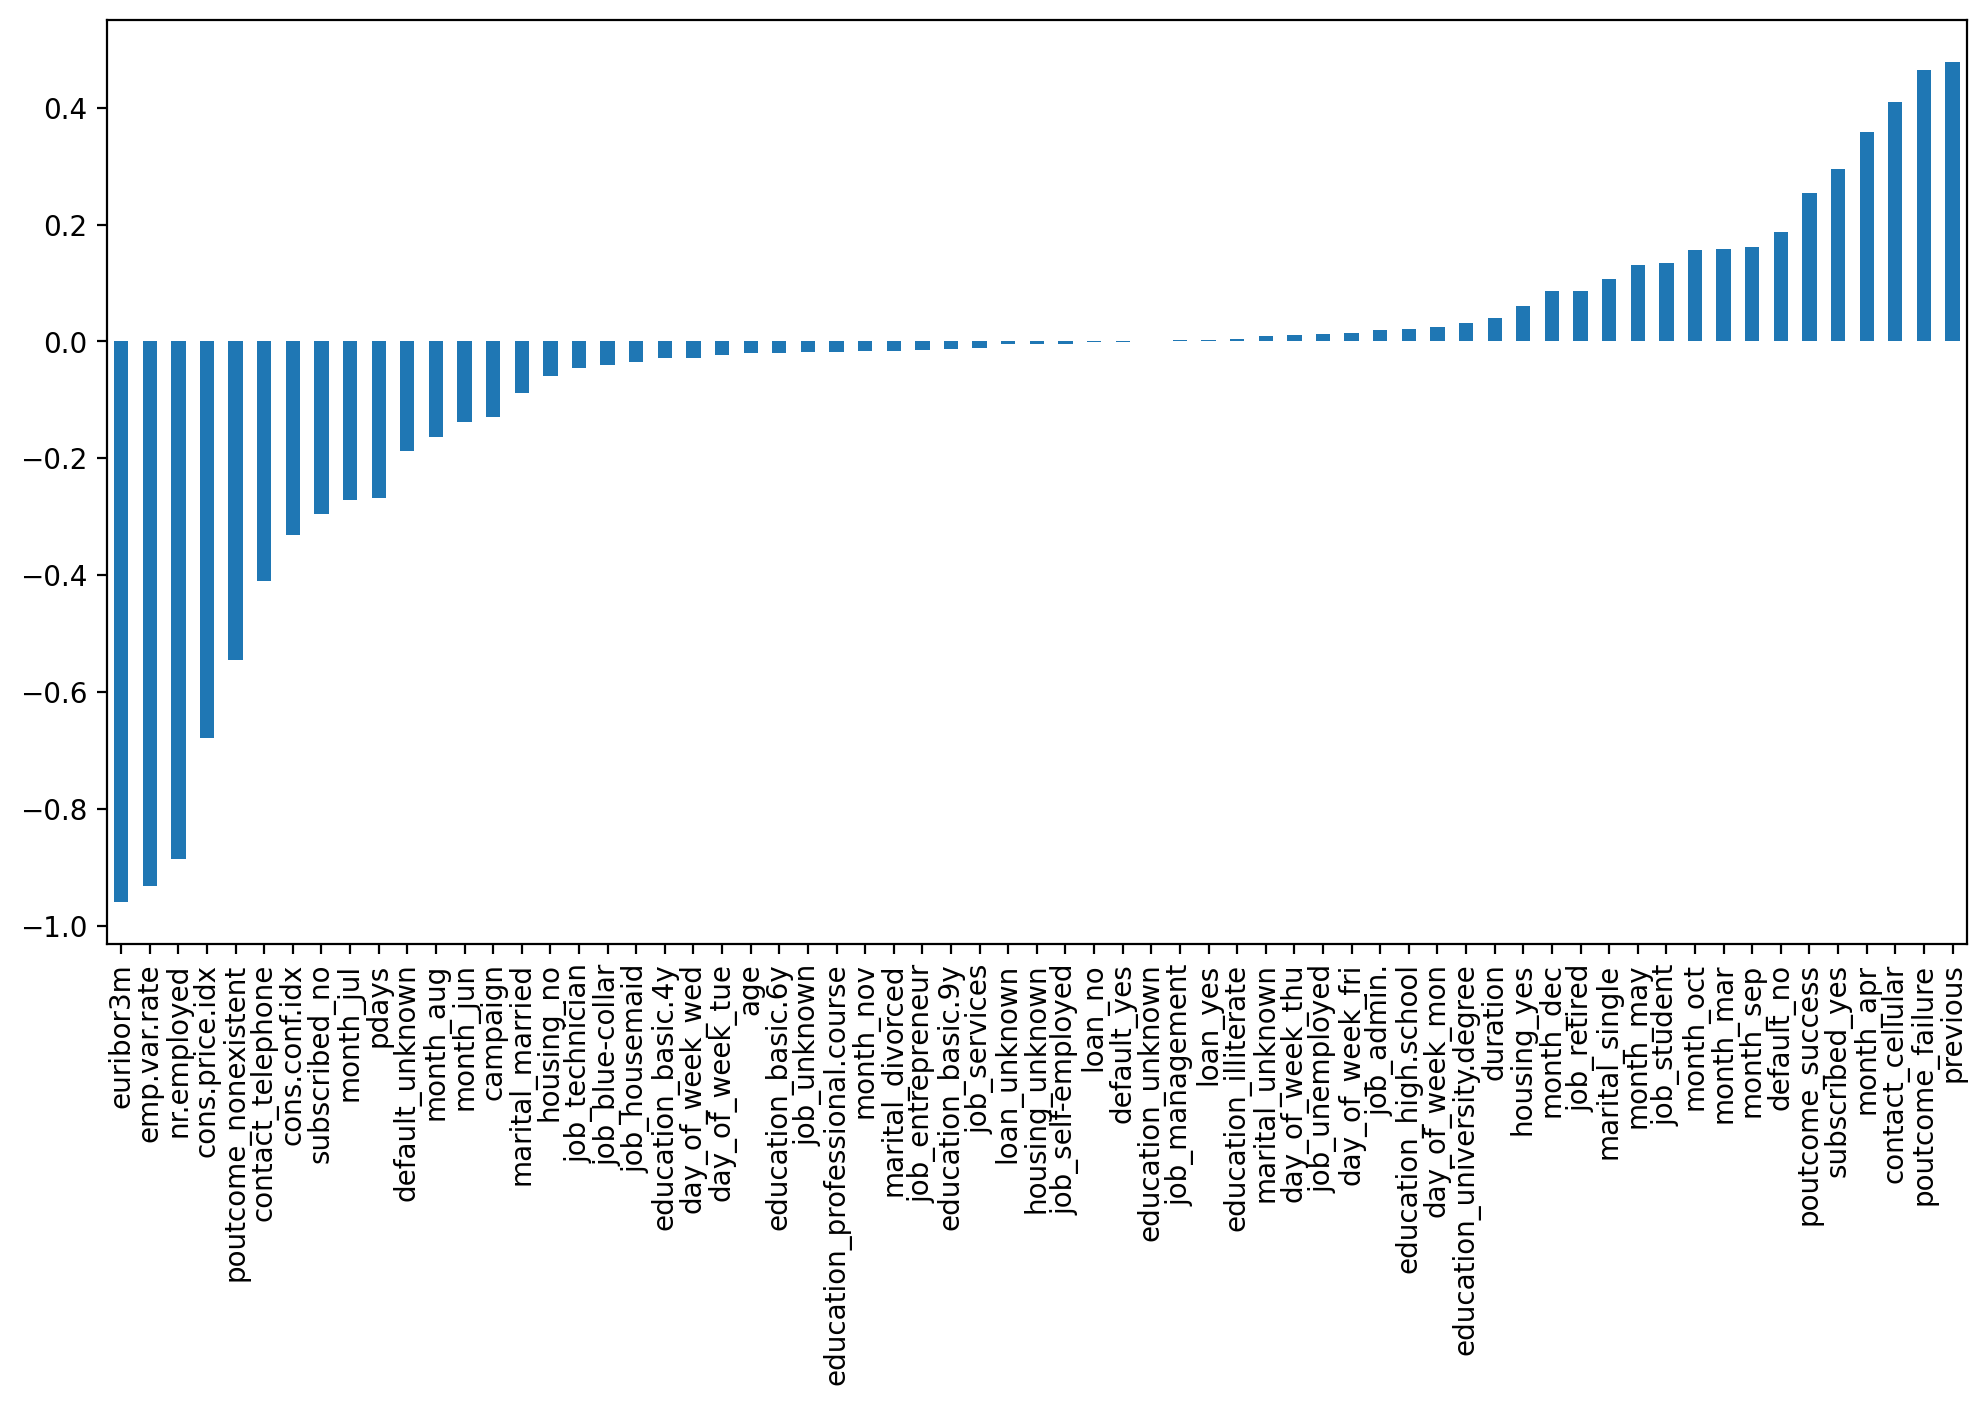

In [56]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar');

## Choosing K Value

In [58]:
ssd = []

for k in range(2, 10):
    
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(scaled_X)
    
    ssd.append(model.inertia_) # SSD point --> cluster center

In [59]:
ssd

[2469792.361662754,
 2437477.2233149926,
 2301417.2191104675,
 2247708.1753796334,
 2249606.0334449867,
 2124181.232916012,
 2136311.5223232172,
 2076042.1972932273]

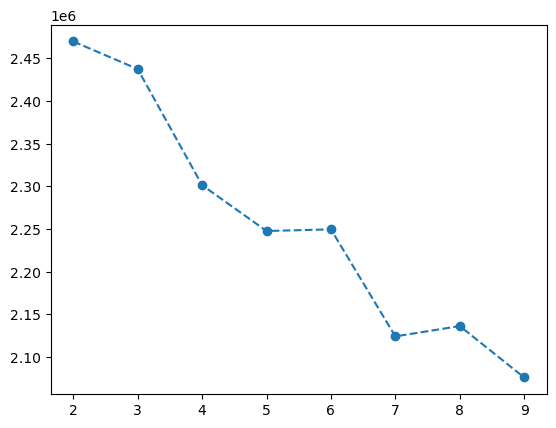

In [61]:
plt.plot(range(2,10),ssd,'o--');

In [62]:
pd.Series(ssd)

0    2.469792e+06
1    2.437477e+06
2    2.301417e+06
3    2.247708e+06
4    2.249606e+06
5    2.124181e+06
6    2.136312e+06
7    2.076042e+06
dtype: float64

In [63]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0              NaN
1    -32315.138348
2   -136060.004205
3    -53709.043731
4      1897.858065
5   -125424.800529
6     12130.289407
7    -60269.325030
dtype: float64

<Axes: >

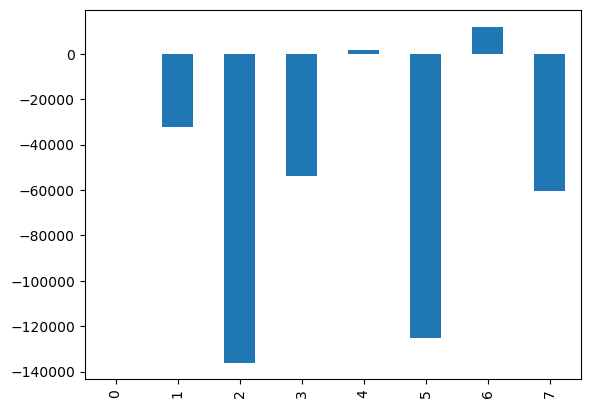

In [64]:
pd.Series(ssd).diff().plot(kind='bar')